#  Lablet-Lablet and Lablet-Docklet interactions based on Polygon clipping algorithm. (MICREAgents Project (FET-EU-FP7), http://www.micreagents.eu/)

### Abhishek Sharma, Microsystems Chemistry and BioIT (BioMIP), Ruhr University, Bochum, Germany
### Last Updated : 5th May, 2016
   

### Description of  Python-notebook

#### We study the interactions between two lablets or a lablet over a docking chip based on surface interactions. Each lablet is defined by active surface (actuators (gold surface) which could be coated with functional groups changing its surface properties such as hydrophilicity / hydrophobicity) and inactive region (remaining surface of lablet, Si). As these interactions are short ranged, they could be quantified by calculating active surface area overlap between the two lablets or lablet and docking chip. In this Python code, we use Polygon Clipping algorithm to calculate active surface overalp. For each active surface, we define surface interaction coefficients, +ve for attraction ( for eg. hydrophobic-hydrophobic) and -ve for repulsion (for eg. hydrophobic-hydrophilic). We perform parametric sweep for by translating and rotating lablet over another lablet or dock chip, and create three dimensional contour plots of the interaction potential v/s rotation and translation operations. 

#### Importing python packages.

In [2]:
import Polygon
import Polygon.IO
from Polygon.Utils import cloneGrid
import sys
import numpy as np
import math as mt
import itertools
from mayavi import mlab
import matplotlib
import matplotlib.pyplot as plt
# import seaborn
%matplotlib inline
%gui wx

#### Setting simulation parameters.

In [3]:
g1, g2, g3, g4 = 1., -1., 1., -1.           # Surface interaction constants
g5, g6, g7, g8 = 1., -1., 1., -1            # Surface interaction constants
L = 100.                                    # Edge length of lablet
xL = 10.                                    # Offset of electrode from the edge of Lablet
eL = 20.                                    # Length of electrode
dL = 120.                                   # Gap between two lablet like pads on dock
selectCase1 = 1                             # 1: Pure translation, 2: Pure rotation, 3: Rotation and translation
labletType = 2                              # 1: Lablet type 1 (4 electrodes), 2: Lablet type 2 (8 electrodes)
dockType = 2                                # 1: Dock type 1 (4 electrodes / docklet), 2: Dock type 2 (8 electrodes / docklet)
plotType = 1                                # Plot type, 1: density plot, 2: three dimensional contour plot
gInt = [g1, g2, g3, g4]                     # List of interaction parameters for lablet type 1
gInt2 = [g1, g2, g3, g4, g5, g6, g7, g8]    # List of interaction parameters for lablet type 2

#### Defining function for creating lablets with four active surfaces.

In [4]:
def create_lablet(L, eL, xL, g, xP, yP):

    """
       Creates Lablet with four active surfaces
    """
    lablet = Polygon.Polygon(((xP, yP), (L+xP, yP), (L+xP, L+yP), (xP, L+yP)))
    poly1 = Polygon.Polygon(((xL+xP, xL+yP), (xL+eL+xP, xL+yP), (xL+eL+xP, xL+eL+yP), (xL+xP, xL+eL+yP)))
    poly2 = Polygon.Polygon(((L-(xL+eL)+xP, xL+yP), (L-xL+xP, xL+yP), (L-xL+xP, xL+eL+yP), (L-(xL+eL)+xP, xL+eL+yP)))
    poly3 = Polygon.Polygon(((L-(xL+eL)+xP, L-(xL+eL)+yP), (L-xL+xP, (L-(xL+eL))+yP), (L-xL+xP,L-xL+yP), (L-(xL+eL)+xP,L-xL+yP)))
    poly4 = Polygon.Polygon(((xL+xP, L-(xL+eL)+yP), (xL+eL+xP, L-(xL+eL)+yP), (xL+eL+xP, L-xL+yP), (xL+xP, L-xL+yP)))

    labletX = poly1 | poly2 | poly3 | poly4

    # Plotting active surfaces of Lablet
    Polygon.IO.writeSVG('lablet.svg', (labletX))

    poly = [poly1, poly2, poly3, poly4]
    g = [g1, g2, g3, g4]
    return zip(*[poly, g])

In [5]:
testLablet = create_lablet(L, eL, xL, gInt, 0., 0.)

![title](lablet.svg)

#### Defining function for creating lablet with eight active surfaces.

In [6]:
def create_lablet2(L, eL, xL, g, xP, yP):

    """
       Creates Lablet with eight active surfaces
    """
    lablet = Polygon.Polygon(((xP, yP), (L+xP, yP), (L+xP, L+yP), (xP, L+yP)))
    gap = (L - eL)/2.
    poly1 = Polygon.Polygon(((xL+xP, xL+yP), (xL+eL+xP, xL+yP), (xL+eL+xP, xL+eL+yP), (xL+xP, xL+eL+yP)))
    poly2 = Polygon.Polygon(((gap+xP, xL+yP), (gap+eL+xP, xL+yP), (gap+eL+xP, xL+eL+yP), (gap+xP, xL+eL+yP)))
    poly3 = Polygon.Polygon(((L-(xL+eL)+xP, xL+yP), (L-xL+xP, xL+yP), (L-xL+xP, xL+eL+yP), (L-(xL+eL)+xP, xL+eL+yP)))
    poly4 = Polygon.Polygon(((L-(xL+eL)+xP, gap+yP), (L-xL+xP, gap+yP), (L-xL+xP, gap+eL+yP), (L-(xL+eL)+xP, gap+eL+yP)))
    poly5 = Polygon.Polygon(((L-(xL+eL)+xP, L-(xL+eL)+yP), (L-xL+xP, (L-(xL+eL))+yP), (L-xL+xP,L-xL+yP), (L-(xL+eL)+xP,L-xL+yP)))
    poly6 = Polygon.Polygon(((gap+xP, L-(xL+eL)+yP), (gap+eL+xP, (L-(xL+eL))+yP), (gap+eL+xP,L-xL+yP), (gap+xP,L-xL+yP)))
    poly7 = Polygon.Polygon(((xL+xP, L-(xL+eL)+yP), (xL+eL+xP, L-(xL+eL)+yP), (xL+eL+xP, L-xL+yP), (xL+xP, L-xL+yP)))
    poly8 = Polygon.Polygon(((xL+xP, gap+yP), (xL+eL+xP, gap+yP), (xL+eL+xP, gap+eL+yP), (xL+xP, gap+eL+yP)))

    labletX = poly1 | poly2 | poly3 | poly4 | poly5 | poly6 | poly7 | poly8

    # Plotting active surfaces of Lablet
    Polygon.IO.writeSVG('lablet1.svg', (labletX))

    poly = [poly1, poly2, poly3, poly4, poly5, poly6, poly7, poly8]
    g = [g1, g2, g3, g4, g5, g6, g7, g8]
    return zip(*[poly, g])

In [7]:
testlablet = create_lablet2(L, eL, xL, gInt2, 0., 0.)

![title](lablet1.svg)

#### Defining function for creating dock with four active electrodes per docklet

In [8]:
def create_dock(L, eL, xL, dL, g, n):

    dock = []
    # Creating periodic pattern of docklets :

    for i in range(n):
        for j in range(n):

            lablet = Polygon.Polygon(((i*dL, j*dL), (L+i*dL, j*dL), (L+i*dL, L+j*dL), (i*dL, L+j*dL)))
            poly = [Polygon.Polygon(((xL+i*dL, xL+j*dL), (xL+eL+i*dL, xL+j*dL), (xL+eL+i*dL, xL+eL+j*dL), (xL+i*dL, xL+eL+j*dL))),
                    Polygon.Polygon(((L-(xL+eL)+i*dL, xL+j*dL), (L-xL+i*dL, xL+j*dL), (L-xL+i*dL, xL+eL+j*dL), (L-(xL+eL)+i*dL, xL+eL+j*dL))),
                    Polygon.Polygon(((L-(xL+eL)+i*dL, L-(xL+eL)+j*dL), (L-xL+i*dL, L-(xL+eL)+j*dL), (L-xL+i*dL, L-xL+j*dL), (L-(xL+eL)+i*dL, L-xL+j*dL))),
                    Polygon.Polygon(((xL+i*dL, L-(xL+eL)+j*dL), (xL+eL+i*dL, L-(xL+eL)+j*dL), (xL+eL+i*dL, L-xL+j*dL), (xL+i*dL, L-xL+j*dL)))]

            dock.append(poly)

    # print len(dock)
    gAll = g * (n**2)
    dock = list(itertools.chain(*dock))

    # Plotting active surfaces of Dock
    dockX = dock[1]
    for i in range(len(dock)):
        dockX = dockX | dock[i]
    Polygon.IO.writeSVG('dock.svg', (dockX))

    # print zip(*[dock, gAll])

    return zip(*[dock, gAll])

#### Defining function for creating dock with eight active electrodes per docklet

In [9]:
def create_dock2(L, eL, xL, dL, g, n):

    dock = []
    # Creating periodic pattern of docklets :

    for i in range(n):
        for j in range(n):

            lablet = Polygon.Polygon(((i*dL, j*dL), (L+i*dL, j*dL), (L+i*dL, L+j*dL), (i*dL, L+j*dL)))
            gap = (L - eL)/2.
            poly = [Polygon.Polygon(((xL+i*dL, xL+j*dL), (xL+eL+i*dL, xL+j*dL), (xL+eL+i*dL, xL+eL+j*dL), (xL+i*dL, xL+eL+j*dL))),
                  Polygon.Polygon(((gap+i*dL, xL+j*dL), (gap+eL+i*dL, xL+j*dL), (gap+eL+i*dL, xL+eL+j*dL), (gap+i*dL, xL+eL+j*dL))),
                  Polygon.Polygon(((L-(xL+eL)+i*dL, xL+j*dL), (L-xL+i*dL, xL+j*dL), (L-xL+i*dL, xL+eL+j*dL), (L-(xL+eL)+i*dL, xL+eL+j*dL))),
                  Polygon.Polygon(((L-(xL+eL)+i*dL, gap+j*dL), (L-xL+i*dL, gap+j*dL), (L-xL+i*dL, gap+eL+j*dL), (L-(xL+eL)+i*dL, gap+eL+j*dL))),
                  Polygon.Polygon(((L-(xL+eL)+i*dL, L-(xL+eL)+j*dL), (L-xL+i*dL, L-(xL+eL)+j*dL), (L-xL+i*dL, L-xL+j*dL), (L-(xL+eL)+i*dL, L-xL+j*dL))),
                  Polygon.Polygon(((gap+i*dL, L-(xL+eL)+j*dL), (gap+eL+i*dL, L-(xL+eL)+j*dL), (gap+eL+i*dL, L-xL+j*dL), (gap+i*dL, L-xL+j*dL))),
                  Polygon.Polygon(((xL+i*dL, L-(xL+eL)+j*dL), (xL+eL+i*dL, L-(xL+eL)+j*dL), (xL+eL+i*dL, L-xL+j*dL), (xL+i*dL, L-xL+j*dL))),
                  Polygon.Polygon(((xL+i*dL, gap+j*dL), (xL+eL+i*dL, gap+j*dL), (xL+eL+i*dL, gap+eL+j*dL), (xL+i*dL, gap+eL+j*dL)))]

            dock.append(poly)

    # print len(dock)
    gAll = g * (n**2)
    dock = list(itertools.chain(*dock))

    # Plotting active surfaces of Dock
    dockX = dock[1]
    for i in range(len(dock)):
        dockX = dockX | dock[i]
    Polygon.IO.writeSVG('dock.svg', (dockX))

    # print zip(*[dock, gAll])

    return zip(*[dock, gAll])

#### Defining function for lablet-lablet interactions

In [10]:
def LabletLabletInteractions(selectCase):
    """ Performs analysis of Lablet-Lablet Interactions

        selectCase = 1 : Pure Translation
                   = 2 : Pure Rotation
                   = 3 : Rotation and Translation
    """

    # Creating Lablet 1 : fixed lablet

    if labletType == 1:
        lablet1 = create_lablet(L, eL, xL, gInt, 0., 0.)

    elif labletType == 2:
        lablet1 = create_lablet2(L, eL, xL, gInt2, 0., 0.)

    else:
        print "wrong Lablet Type."
        sys.exit()

    pL1, pL2 = [], []
    cnt1, cnt2 = 0, 0

    for i in range(len(lablet1)):
        if lablet1[i][1] == 1:
                cnt1 += 1
                if cnt1 == 1:
                    pL1 = lablet1[i][0]

                else:
                    pL1 = pL1 | lablet1[i][0]


        elif lablet1[i][1] == -1:
                cnt2 += 1
                if cnt2 == 1:
                    pL2 = lablet1[i][0]

                else:
                    pL2 = pL2 | lablet1[i][0]
        else:
                print "problem occured..."


# ---------------------------------------------------------------------------------- #

    if selectCase == 1:

        """ Running pure translational operations """
        print "Pure Translational Operations"

        iPosX, iPosY = -L, -L
        nopX, nopY = 100, 100
        dX, dY = 2.*L/nopX, 2.*L/nopY
        intArea = []

        for i in range(nopX):
            for j in range(nopY):
                cnt1, cnt2 = 0, 0
                pX1, pX2 = [], []
                if labletType == 1:
                    lablet2 = create_lablet(L, eL, xL, gInt, -L + i*dX, -L + j*dY)

                elif labletType == 2:
                    lablet2 = create_lablet2(L, eL, xL, gInt2, -L + i*dX, -L + j*dY) 
                else:
                    print "wrong Lablet Type."
                    sys.exit()

                for k in range(len(lablet2)):
                    if lablet2[k][1] == 1:
                        cnt1 += 1
                        if cnt1 == 1:
                            pX1 = lablet2[k][0]

                        else:
                            pX1 = pX1 | lablet2[k][0]


                    elif lablet2[k][1] == -1:
                        cnt2 += 1
                        if cnt2 == 1:
                             pX2 = lablet2[k][0] 
                        else:
                            pX2 = pX2 | lablet2[k][0]

                    else:
                        print "problem occured..."


                # Calculating interaction area :

                intS1, intS2 = (pX1 & pL1).area(), (pX2 & pL2).area()
                intS3, intS4 = (pX1 & pL2).area(), (pX2 & pL1).area()

                intArea.append([-L + i*dX, -L + j*dY, ((intS1 + intS2) - (intS3 + intS4))])

        # ---- Plotting data as two dimensional density plot ---- #

        data = np.array(intArea)

        x, y, z = np.arange(-L, L, dX), np.arange(-L, L, dY), data[:, 2]

        X, Y = np.meshgrid(x, y)
        Z = np.reshape(z, (nopX, nopY))
        plt.figure()
        plt.imshow(Z, vmin=Z.min(), vmax=Z.max(), origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
        plt.colorbar()
        matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
        CS = plt.contour(X, Y, Z, 10, linewidths=1, colors='k')
        # plt.clabel(CS, inline=1, fontsize=8)
        plt.xlabel('X')
        plt.ylabel('Y')
        # plt.title("Interaction Potential v/s XY-Translation")
        matplotlib.rcParams.update({'font.size': 12})
        plt.show()

    elif selectCase == 2:

        """ Running pure rotational operations """
        print "Pure Rotational Operations"

        noTheta = 360
        totTheta = 2.*mt.pi
        dTheta = (totTheta/noTheta)
        intArea = []
        xI, yI = L/2., L/2.

        for i in range(noTheta):
            cnt1, cnt2 = 0, 0
            pX1, pX2 = [], []

            if labletType == 1:
                lablet2 = create_lablet(L, eL, xL, gInt, 0., 0.)

            elif labletType == 2:
                lablet2 = create_lablet2(L, eL, xL, gInt2, 0., 0.)

            else:
                print "wrong Lablet Type."
                sys.exit()

            for k in range(len(lablet2)):
                lab = lablet2[k][0]
                lab.rotate(i*dTheta, xI, yI)

                if lablet2[k][1] == 1:
                    cnt1 += 1
                    if cnt1 == 1:
                        pX1 = lab

                    else:
                        pX1 = pX1 | lab


                elif lablet2[k][1] == -1:
                    cnt2 += 1
                    if cnt2 == 1:
                        pX2 = lab

                    else:
                        pX2 = pX2 | lab

                else:
                    print "problem occured..."


            # Calculating interaction area :

            intS1, intS2 = (pX1 & pL1).area(), (pX2 & pL2).area()
            intS3, intS4 = (pX1 & pL2).area(), (pX2 & pL1).area()
            intArea.append([i*dTheta, ((intS1 + intS2) - (intS3 + intS4))])

        # ---- Plotting data as two dimensional density plot ---- #

        data = np.array(intArea)

        plt.xlabel('Angle of Rotation (in degrees)')
        plt.ylabel('Overlap Area')
        plt.title("Intersection Potential v/s Pure Rotation")
        matplotlib.rcParams.update({'font.size': 12})
        lines = plt.plot(data[:, 0], data[:, 1])
        plt.setp(lines, color='b', linewidth=2.0)
        plt.show()


    elif selectCase == 3:

        """ running rotational translational operations """

        print "Rotational-Translational Operations"
        iPosX, iPosY = -L, -L
        nopX, nopY = 100, 100
        dX, dY = 2.*L/nopX, 2*L/nopY
        noTheta = 360
        totTheta = 2*mt.pi
        dTheta = (totTheta/noTheta)
        intArea = []

        for i in range(nopX):
            for j in range(nopY):
                for k in range(noTheta):
                    cnt1, cnt2 = 0, 0
                    pX1, pX2 = [], []

                    if labletType == 1:
                          lablet2 = create_lablet(L, eL, xL, gInt, -L + i*dX, -L + j*dY)

                    elif labletType == 2:
                          lablet2 = create_lablet2(L, eL, xL, gInt2, -L + i*dX, -L + j*dY)

                    else:
                            print "wrong Lablet Type."
                            sys.exit()

                    for l in range(len(lablet2)):
                        lab = lablet2[l][0]
                        lab.rotate(k*dTheta, (-L+i*dX)+ L/2., (-L+j*dY)+ L/2.)

                        if lablet2[l][1] == 1:
                            cnt1 += 1
                            if cnt1 == 1:
                                pX1 = lab

                            else:
                                pX1 = pX1 | lab


                        elif lablet2[l][1] == -1:
                            cnt2 += 1
                            if cnt2 == 1:
                                pX2 = lab

                            else:
                                pX2 = pX2 | lab

                        else:
                            print "problem occured..."


                    # Calculating interaction area :

                    intS1, intS2 = (pX1 & pL1).area(), (pX2 & pL2).area()
                    intS3, intS4 = (pX1 & pL2).area(), (pX2 & pL1).area()
                    intArea.append([-L + i*dX, -L + j*dY, k*dTheta, ((intS1 + intS2) - (intS3 + intS4))])

        # Plotting 3D contour plot
        data = np.array(intArea)

        # Saving a data to file :
        # np.savetxt('test.out', data)
        # X, Y, Z = data[:,0], data[:,1], data[:,2]

        Scalar = data[:,3]
        reshapeScalar = np.reshape(Scalar, (nopX, nopY, noTheta))
        plot_extent = (-L, L, -L, L, 0, 360)
        mPlot = mlab.contour3d(reshapeScalar, contours=50, transparent=True, colormap='gist_rainbow', extent=plot_extent)
        mlab.outline(mPlot, color=(.7, .7, .7), extent=plot_extent)

        mlab.axes(mPlot, color=(.7, .7, .7), extent=plot_extent,
                  ranges=(-100, 200, -100, 200, 0, 360), xlabel='X trans.', ylabel='Y trans.',
                  zlabel='theta rot.')



        """
        mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(reshapeScalar),
                                         plane_orientation='x_axes',
                                         slice_index=11,)

        mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(reshapeScalar),
                                         plane_orientation='y_axes',
                                         slice_index=11,)

        mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(reshapeScalar),
                                         plane_orientation='z_axes',
                                         slice_index=11,)
        """
        #  mlab.savefig('Output.png')

    else:
        print "Wrong parameters ..."

    return

#### Defining function for lablet-dock interactions

In [11]:
def LabletDockInteractions(selectCase):

    """ Performs analysis of Lablet-Dock Interactions

        selectCase = 1 : Pure Translation
                   = 2 : Rotation and Translation
    """

    if dockType == 1:
        dock = create_dock(L, eL, xL, dL, gInt, 3)

    elif dockType == 2:
        dock = create_dock2(L, eL, xL, dL, gInt2, 3)

    else:
        print "wrong paramter..."

    pL1, pL2 = [], []
    cnt1, cnt2 = 0, 0

    for i in range(len(dock)):
        if dock[i][1] == 1:
            cnt1 += 1
            if cnt1 == 1:
                pL1 = dock[i][0]

            else:
                pL1 = pL1 | dock[i][0]


        elif dock[i][1] == -1:
            cnt2 += 1
            if cnt2 == 1:
                pL2 = dock[i][0]

            else:
                pL2 = pL2 | dock[i][0]

        else:
            print "problem occured..."

    # print len(dock)

    # ---------------------------------------------------------------------------------- #

    if selectCase == 1:
        """running pure translational operations """

        print "Pure Translational Operations"
        iPosX, iPosY = -L, -L
        nopX, nopY = 100, 100
        dX, dY = 4.5*L/nopX, 4.5*L/nopY
        intArea = []

        for i in range(nopX):
            for j in range(nopY):
                cnt1, cnt2 = 0, 0
                pX1, pX2 = [], []

                if labletType == 1:
                    lablet2 = create_lablet(L, eL, xL, gInt, -L + i*dX, -L + j*dY)

                elif labletType == 2:
                    lablet2 = create_lablet2(L, eL, xL, gInt2, -L + i*dX, -L + j*dY)

                else:
                    print "wrong parameter"

                for k in range(len(lablet2)):
                    if lablet2[k][1] == 1:
                        cnt1 += 1
                        if cnt1 == 1:
                            pX1 = lablet2[k][0]

                        else:
                            pX1 = pX1 | lablet2[k][0]


                    elif lablet2[k][1] == -1:
                        cnt2 += 1
                        if cnt2 == 1:
                            pX2 = lablet2[k][0]

                        else:
                            pX2 = pX2 | lablet2[k][0]

                    else:
                        print "problem occured..."


                # Calculating interaction area :

                intS1, intS2 = (pX1 & pL1).area(), (pX2 & pL2).area()
                intS3, intS4 = (pX1 & pL2).area(), (pX2 & pL1).area()

                intArea.append([-L + i*dX, -L + j*dY, ((intS1 + intS2) - (intS3 + intS4))])

        # ---- Plotting data as two dimensional density plot ---- #

        data = np.array(intArea)

        x, y, z = np.arange(-L, 3.5*L, dX), np.arange(-L, 3.5*L, dY), data[:, 2]

        X, Y = np.meshgrid(x, y)
        Z = np.reshape(z, (nopX, nopY))
        plt.figure()
        plt.imshow(Z, vmin=Z.min(), vmax=Z.max(), origin='lower', extent=[X.min(), X.max(), Y.min(), Y.max()])
        plt.colorbar()
        matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
        print np.shape(X), np.shape(Y), np.shape(Z)
        CS2 = plt.contour(X, Y, Z, 10, linewidths=1, colors='k')
        # plt.clabel(CS2, inline=1, fontsize=8)
        plt.xlabel('X')
        plt.ylabel('Y')
        # plt.title("Interaction Potential v/s XY-Translation")
        matplotlib.rcParams.update({'font.size': 12})
        plt.show()

    elif selectCase == 2:
        print "same as above case..."

    elif selectCase == 3:

        """ running rotational-translational operations """

        print "Rotational-Translational Operations"
        iPosX, iPosY = -L, -L
        nopX, nopY = 200, 200
        dX, dY = 3.5*L/nopX, 3.5*L/nopY
        noTheta = 90
        totTheta = mt.pi
        dTheta = (totTheta/noTheta)
        intArea = []


        for i in range(nopX):
            for j in range(nopY):
                for k in range(noTheta):
                    cnt1, cnt2 = 0, 0
                    pX1, pX2 = [], []

                    if labletType == 1:
                        lablet2 = create_lablet(L, eL, xL, gInt, -L + i*dX, -L + j*dY)

                    elif labletType == 2:
                        lablet2 = create_lablet2(L, eL, xL, gInt2, -L + i*dX, -L + j*dY)

                    else:
                        print "wrong parameters.."

                    for l in range(len(lablet2)):
                        lab = lablet2[l][0]
                        lab.rotate(k*dTheta, (-L+i*dX)+ L/2., (-L+j*dY)+ L/2.)

                        if lablet2[l][1] == 1:
                            cnt1 += 1
                            if cnt1 == 1:
                                pX1 = lab

                            else:
                                pX1 = pX1 | lab


                        elif lablet2[l][1] == -1:
                            cnt2 += 1
                            if cnt2 == 1:
                                pX2 = lab

                            else:
                                pX2 = pX2 | lab

                        else:
                            print "problem occured..."


                    # Calculating interaction area :

                    intS1, intS2 = (pX1 & pL1).area(), (pX2 & pL2).area()
                    intS3, intS4 = (pX1 & pL2).area(), (pX2 & pL1).area()
                    intArea.append([-L + i*dX, -L + j*dY, k*dTheta, ((intS1 + intS2) - (intS3 + intS4))])

        # Plotting 3D contour plot
        data = np.array(intArea)

        # Saving a data to file :
        # np.savetxt('test.out', data)
        # X, Y, Z = data[:,0], data[:,1], data[:,2]

        Scalar = data[:,3]
        reshapeScalar = np.reshape(Scalar, (nopX, nopY, noTheta))
        plot_extent = (-L, 4.5*L, -L, 4.5*L, 0, 180)
        mPlot = mlab.contour3d(reshapeScalar, contours=50, transparent=True, colormap='gist_rainbow', extent=plot_extent)
        mlab.outline(mPlot, color=(.7, .7, .7), extent=plot_extent)

        mlab.axes(mPlot, color=(.7, .7, .7), extent=plot_extent,
                  ranges=(-100, 450, -100, 450, 0, 180), xlabel='X trans.', ylabel='Y trans.',
                  zlabel='theta rot.')


        """
        mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(reshapeScalar),
                                         plane_orientation='x_axes',
                                         slice_index=11,)

        mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(reshapeScalar),
                                         plane_orientation='y_axes',
                                         slice_index=11,)

        mlab.pipeline.image_plane_widget(mlab.pipeline.scalar_field(reshapeScalar),
                                         plane_orientation='z_axes',
                                         slice_index=11,)
        """
        mlab.savefig('Output.png')


    else:
        print "wrong case ..."

    return

### Test case 1 : Lablet-Lablet interactions for pure translation operations

Pure Translational Operations


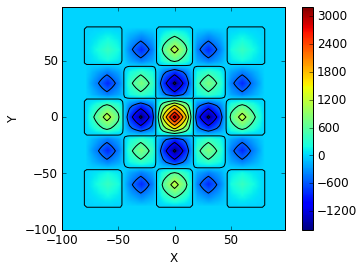

In [12]:
LabletLabletInteractions(selectCase1)

### Test case 2 : Lablet-Dock interactions for pure translation operations

Pure Translational Operations
(100, 100) (100, 100) (100, 100)


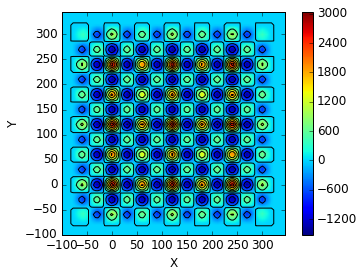

In [ ]:
LabletDockInteractions(selectCase1)

### Test case 3 : Lablet-Dock interactions for pure translation operations
#### (This calculation will take time... the created plot from Python-Mayavi will not be embedded in the notebook.) 


In [ ]:
selectCase1 = 3
LabletLabletInteractions(selectCase1)

Rotational-Translational Operations
